##  <span style="color:blue">Exercise 2 - Driver file </span>
## <span style="color:blue">Computer Vision - Fall 2020


**Lecturer:** Prof. Yael Moses, IDC

**TA:** Eyal Friedman, IDC

**Sybmission date: 19.12.2020**



In this excercise you will practice working with geometric tools for analyzing 3D scenes from 2D images.

## Submission guidelines:

1. Your zip file should include the following files only:
    - ex2-driver.ipynb  **Or**  ex2-driver.py 
    - ex2_ID_ID.doc  **Or**  ex2_ID_ID.pdf
2. The results you are asked to display and the open questions should be answered in a doc/pdf file. 
   (Don't add the python code to that file.)
4. You may use any IDE  (e.g., Spyder, Jupyter Notebook, Pycharm, ect.).
5. Name the file 'ex2_ID_ID.zip' and do **not** include any additional directories. 
6. Submit using *moodle*
7. Submit on time!
8. You can submit this assignment in pairs (no triples).

## Read the following instructions carefully:
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **code that fails to  run will not be graded.**
5. Document your code properly.

## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the Web. However, if  you do so, then you will not learn what you should learn from it. In addition, since we  grade  the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solves the task. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.


In [1]:
import cv2

# This opens an inteactive figure - use it in part B
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# change the way floating point numbers, arrays and other NumPy objects are displayed 
np.set_printoptions(suppress=True)
# ?np.set_printoptions

In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.7.9
Numpy version:  1.18.5


In [4]:
# docs.google.com/document/d/1nN1hPVZ43l1Xf-8EaNBw7gUjW9M7d_YsBdvx6SyNIfs/edit
# Let's write the answers here!

## Section A: Projection

**In this part you will go over projection matrix,  and use them to project 3D points to an image.**



Fill the missing values, given partial values of the parameters of the left and right cameras.

\
**Right image parameters:**

The projection matrix of the right image:

In [5]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [6]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [7]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [8]:
# As we learned, a camera with rectangular pixels of size 1/sx X 1/sy , with focal length f, and principal point
# (O_x, O_y) (i.e., the intersection of the optical axis, Z, with the image plane provided in pixel coordinates)
# has the intrinsic calibration matrix:
# M_int = [[ alpha_x  0        O_x  0 ]
#          [ 0        alpha_y  O_y  0 ]
#          [ 0        0        1    0 ]], where alpha_x = s_x * f    and alpha_y = s_y * f

# Thereore, we can simply extract the values for o_x and o_y from M, based only on its indices.
OxR = MR[0, 2]
OyR = MR[1, 2]

Compute the right image scale factor which is consistent with MR:

In [9]:
# As explained in the previous cell's comments, alpha_x = s_x * f    and alpha_y = s_y * f
# Thereore, we can simply extract the values for s_x and s_y from M, based only on M's indices and divide by the focal length.
SxR = MR[0, 0]/fR
SyR = MR[1, 1]/fR

Compute the right image intrinsic matrix which is consistent with MR:

In [14]:
# Mint is a 3 X 4 matrix, which is the part of M without the righnmost column
# M = Mint[I|0]
MintR = MR[:, 0:3]

 
**Left image parameters**
 
Left image center (principal point):

In [15]:
OxL = 320.798101
OyL = 236.431326

Scale factor:

In [16]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [17]:
fL = 1

Translation vector w.r.t. the world origin:

In [18]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [19]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera: 

In [20]:
MintL = np.zeros((3,4))
MintL[0,0] = SxL * fL
MintL[1,1] = SyL * fL
MintL[2,2] = 1
MintL[0,2] = OxL
MintL[1,2] = OyL

MintL

array([[1095.671499,    0.      ,  320.798101,    0.      ],
       [   0.      , 1094.559584,  236.431326,    0.      ],
       [   0.      ,    0.      ,    1.      ,    0.      ]])

Compute the projection matrix of the left camera

In [131]:
# M = M_int[I|0] * M_ext = M_int * M_R * M_T

MRL = np.pad(RL, [(0, 1), (0, 1)], mode='constant')
MRL[len(MRL) - 1, len(MRL[0]) - 1] = 1

MTL = np.eye(4,4)
MTL[0, len(MTL[0]) - 1] = TL[0,0]
MTL[1, len(MTL[0]) - 1] = TL[1,0]
MTL[2, len(MTL[0]) - 1] = TL[2,0]

MextL = np.dot(MRL, MTL)

ML = np.dot(MintL, MextL)
print(MRL)
print(MTL)
print(MextL)
print((0.9891 * 178.2218) + (0.0602 * 178.2218) + (0.1346 * 178.2218))

print(ML)

[[ 0.9891  0.0602 -0.1346  0.    ]
 [-0.059   0.9982  0.0134  0.    ]
 [ 0.1351 -0.0053  0.9908  0.    ]
 [ 0.      0.      0.      1.    ]]
[[   1.        0.        0.     -178.2218]
 [   0.        1.        0.      -18.8171]
 [   0.        0.        1.       13.7744]
 [   0.        0.        0.        1.    ]]
[[   0.9891        0.0602       -0.1346     -179.26600604]
 [  -0.059         0.9982        0.0134       -8.08356606]
 [   0.1351       -0.0053        0.9908      -10.33035903]
 [   0.            0.            0.            1.        ]]
210.99678902
[[   1127.06850311      64.2591943      170.36937471 -199730.61311706]
 [    -32.63714331    1091.33629072     248.92325623  -11290.36518739]
 [      0.1351          -0.0053           0.9908         -10.33035903]]


In [129]:
# a = np.array([[1, 0],
#               [1, 1]])
# b = np.array([[4, 1],
#               [2, 2]])

# 1 0    4 1    =  1*4+0*2 1*1+0*2  =  4 1
# 1 1    2 2    =  1*4+1*2 1*1+1*2  =  6 3


# np.dot(a, b)

Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [148]:
CL_homogenous = null_space(ML)
CR_homogenous = null_space(MR)

print(CL_homogenous)
print(CR_homogenous)

# These are in Homogenous coordinates!!!
# We need to convert each COP to Cartesian coordinates.
# To do so, we divide each value in every COP with its last value, and removing this last index after

CL = CL_homogenous/CL_homogenous[len(CL_homogenous) - 1]
CL = CL[: len(CL) - 1] # remove last index (slicing)

CR = CR_homogenous/CR_homogenous[len(CR_homogenous) - 1]
CR = CR[: len(CR) - 1]

print(CL)
print(CR)

[[ 0.99153249]
 [ 0.10468846]
 [-0.07663353]
 [ 0.00556347]]
[[0.]
 [0.]
 [0.]
 [1.]]
[[178.2218]
 [ 18.8171]
 [-13.7744]]
[[0.]
 [0.]
 [0.]]


Compute the distance between CL and CR:
    

In [152]:
# The Euclidean distance
D = np.sqrt(((CL - CR)**2))
D

array([[178.2218],
       [ 18.8171],
       [ 13.7744]])

## Part A2: Hands on Triangulation 

Write a function p = proj(M,P) that recieves as input the 3D point P and a projection matrix M, and outputs the 2D coordinates of the projected point.


In [136]:
# Your code for proj function
def proj(M,P):
    
    # your code
    pass
    
    return None


1.	Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

    a.	What are the coordinates (Cartesian) of the points in the left camera coordinate system?\
    b.	What are the coordinates (Cartesian) of the points in the right camera coordinate system?
   

In [137]:
PL = None
PR = None
QL = None
QR = None

In [138]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)

### Read two images and display the projections of P and Q on the two given images ###

[//]: # " "
The code below should return this result: 

![Example](PandQprojections1.png "Example")

TypeError: 'NoneType' object is not subscriptable

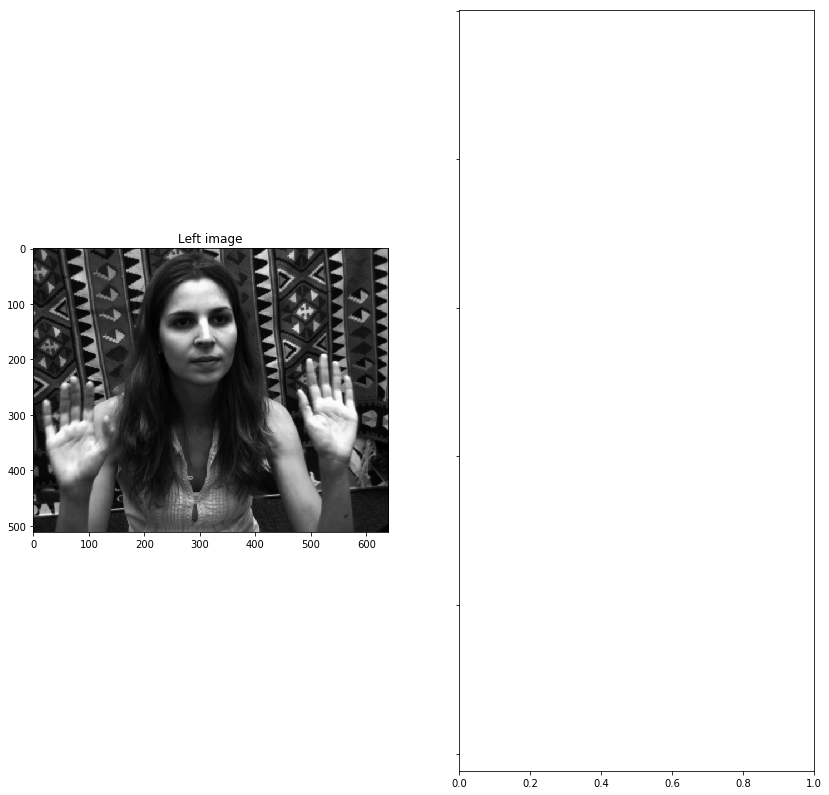

In [139]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b')

**Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other doe not. Please give a short explanation of what may have caused it.

**Your answer:**

## Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**Answer Quesion:**
Can you double check if they are correct using F? If so, check it.


In [ ]:
eL = None
eR = None
F = None

## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

In [ ]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt  

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data: 
    # Write your own implementation here.
    pass
    

In [ ]:
%matplotlib inline

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

## Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


In [ ]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

Not for submission: Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Tru the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [ ]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [ ]:
print(F_calc.T)
print(F)

And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc.

In [ ]:
from scipy.linalg import null_space
e1=null_space(F_calc)
e2=null_space(F)

e1_c = e1[0:2,0]/e1[2,0]
e2_c = e2[0:2,0]/e2[2,0]

print(np.linalg.norm(e1_c-e2_c))

### Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit at the pdf file your results of the cosine distance and the output of your images.

## Part D1 ##

**Here you will compute stereo - the 3D structure from a pair of rectified images.**\
Your main program should take two input images (left and right) and a window size. The output of the function should be:

a) Computed disparity map for the left image - see instructions below.

b) Three matrices X, Y, Z with the x, y, z coordinates of each pixel in the left image. Assign zero for pixels for which the disparity was not computed.

Instructions:
1. Read the two images view1.png and view5.png.
   The image planes are co-planar. The distance between the cameras is 160mm.
2. Write an algorithm that receives two rectified images (coplanar and parallel to the line connecting the two COP, with the same focal length), and compute a naive disparity along corresponding epipolar lines:\
    **2.a** For each pair of pixels (one from each image) compute the similarity between  rectangle patches around it using  normalized correlation defined by: $$\frac{v_1⋅v_2}{‖v_1 ‖‖v_2 ‖}$$ where $v_i$ is a descriptor of the patch.\
    For example, you can use the intenisty and reshape a 3×3 patch to a vector, using the reshape function as follows:\
    ***v_1 = I[i-1:i+1,j-1:j+1].reshape(1,9)***. \
    **2.b.** The correspondence is defined to be the one with the higher similarity. The algorithm should accept as  parameters: the two images, the size of the patch (*s_x,s_y*),  and the disparity range (*d_min,d_max*). For example, if *(d_min,d_max)=(20,120)* it follows that you search for *(x,y)* in the left image, its corresponding patch in the range *(x-120:x-20,y).*\
    **2.c.** The output of this algorithm is a matrix D that consists of the disparity of each pixel.\
    **2.d.** Apply your function to view1.png and view5.png, and display the disparity map as an image. The disparity range is (20,120) (the x location in view1 – the x location in view5).
3. To evaluate your result, use back project the points of view1.png to view5.png, and look at the absolute value of their differences. By ‘back project’ we mean to compute view5.png using view1.png by using the computed disparity.\
    **You can use the function** ***dst = cv2.remap(src, map_x, map_y, cv2.INTER_LINEAR)*** where *map_x* and *map_y* are the movements in each axis.
    You can use the sum of differences as a score for evaluation. Compute it for 3 different window sizes and present the results in the doc/pdf file.

4. Compute the depth map using the disparity. Add to your disparity depth map the value 100, since images were cropped. Note – simple triangulation can be applied here. Display it as an image. Assume that scaled focal lengths (f in the presentation) are α_x=α_y=1.
5. Compute the matrices X,Y,Z - and present them as a 3D plot.


## Part D2 

Repeat D1 with using the values of the gradients of the images instead of the intensities for computing the descriptors v_1 and v_2.

**Answer Questions:**
1. What are the differences in the results of D1 and D2? 
2. How does the patch size affect the results? 
3. How does the  order preserving assumption affect the results?
4. Which regions have more errors? Why?

BONUS: repeat D1 but use dynamic programing to compute an optimal order preserving disparity.

##  Part E ##

### Theoretical questions: ###
1. Suggest a method to remove outliers when you have three general images of the same scene.
2. Compare the following two methods to remove outliers: (a) Use  RANSAC with  the homography model (we will learn it in class 6); (ii) Use  RANSAC with the epipolar geometry (fundamental matrix) model. When do you expect (i) to give better results, and when do you expect (ii)  to give better results? Explain your answer.
3. Why is C=nullspace(M)? Go over the proof in Class 4 slides 52-55. It is nice!\
   Answer:
   a. Why is the degree of M  at most 3?
   b. Let A and B be two 3D points such that B is not on the 3D line that connects A and the center of projection COP.\
      Is it possible that MA=MB? Give a short explanation for your answer.
   c. Why is 𝑀(1−𝜆)C=0  (where C is in homogenous coordinates)?

